In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
fontsize = 14

# Preparations

## Loading the data

First we load the scores of the regressions $x_i \,,\, N_i(0) \,,\, \frac{dN_i}{dt}(0) \;\rightarrow\; N_i(t_\text{final}) \,,\, \rho_\text{max} \,,\, t_{\rho_\text{max}}$ :

In [3]:
scores = pd.read_csv("importances/multi-scores.csv")

We also load the importances of the various input features :

In [4]:
importances = pd.read_csv("importances/multi-importances.csv")

## Data frame

We combine the _row_ and _column_ importances, and basically flip the format of the data frame :

In [5]:
dfs = []
for p in importances["plate"].unique():
    df = importances[importances["plate"] == p]
    del df["plate"]
    df.index = df["factor"]
    del df["factor"]
    df = df.T
    
    df["position"] = df["row"] + df["column"]
    del df["row"]
    del df["column"]
    
    dfs.append(df[["position", "N(0)", "dN/dt(0)"]].T)

importances = pd.concat(dfs, keys = importances["plate"].unique(), names = ["plate"])

# Figure

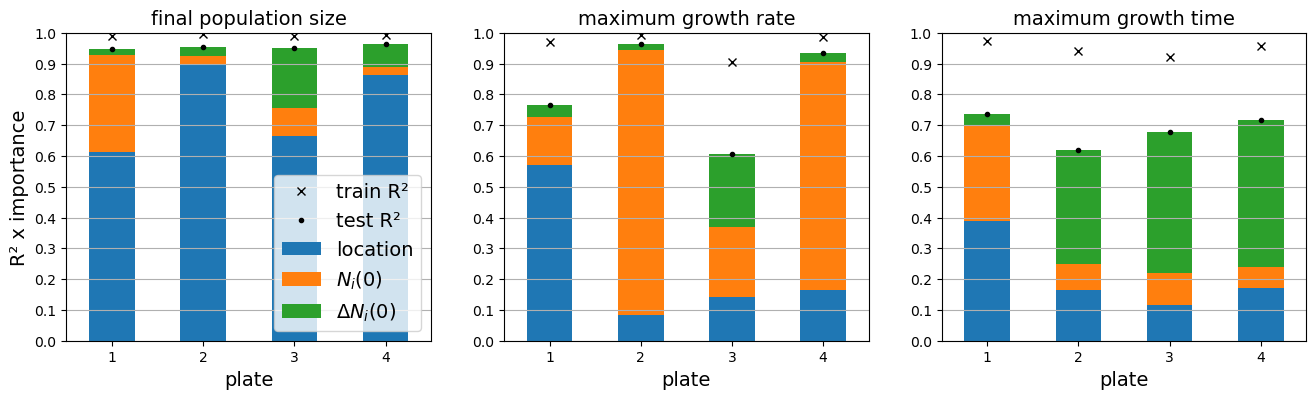

In [6]:
fig, axes = plt.subplots(ncols = importances.shape[1], figsize = (16, 4))

for name, ax in zip(importances.columns, axes):
    (importances[name].unstack().T * scores[scores["data set"] == "test"].reset_index()[name]).T.plot.bar(stacked = True, ax = ax, legend = False)
    scores[scores["data set"] == "train"].reset_index()[name].plot(style = "x", color = "black", ax = ax, label = "train R²")
    scores[scores["data set"] == "test"].reset_index()[name].plot(style = ".", color = "black", ax = ax, label = "test R²")
    ax.set_title(name, fontsize = fontsize)
    ax.grid(axis = "y")
    ax.set_xlabel("plate", fontsize = fontsize)
    ax.set_xticklabels((1, 2, 3, 4))
    ax.set_yticks(np.arange(11) * 0.1)
    ax.set_ylim((0, 1))
axes[0].set_ylabel("R² x importance", fontsize = fontsize)
l = axes[0].legend(loc = "lower right", fontsize = fontsize)
l.get_texts()[2].set_text("location")
l.get_texts()[3].set_text(r"$N_i(0)$")
l.get_texts()[4].set_text(r"$\Delta N_i(0)$")

fig.savefig("plots/figure-2/multi-Nt.pdf", bbox_inches = "tight")
fig.savefig("plots/figure-2/multi-Nt.png", bbox_inches = "tight")